In [10]:
from scipy.optimize import root_scalar

def equation(x):
    return 2*x**3 - 30*x**2 + 51*x - 6363

# Definindo os limites inferior e superior para x
lower_bound = 0
upper_bound = 30

# Encontrando a raiz da equação dentro do intervalo
sol = root_scalar(equation, bracket=[lower_bound, upper_bound], method='brentq')

if sol.converged:
    print("Valor de x:", sol.root)
    print("Valor da função objetivo:", equation(sol.root))
else:
    print("Não foi possível encontrar uma solução dentro do intervalo fornecido.")

Valor de x: 21.0
Valor da função objetivo: 0.0


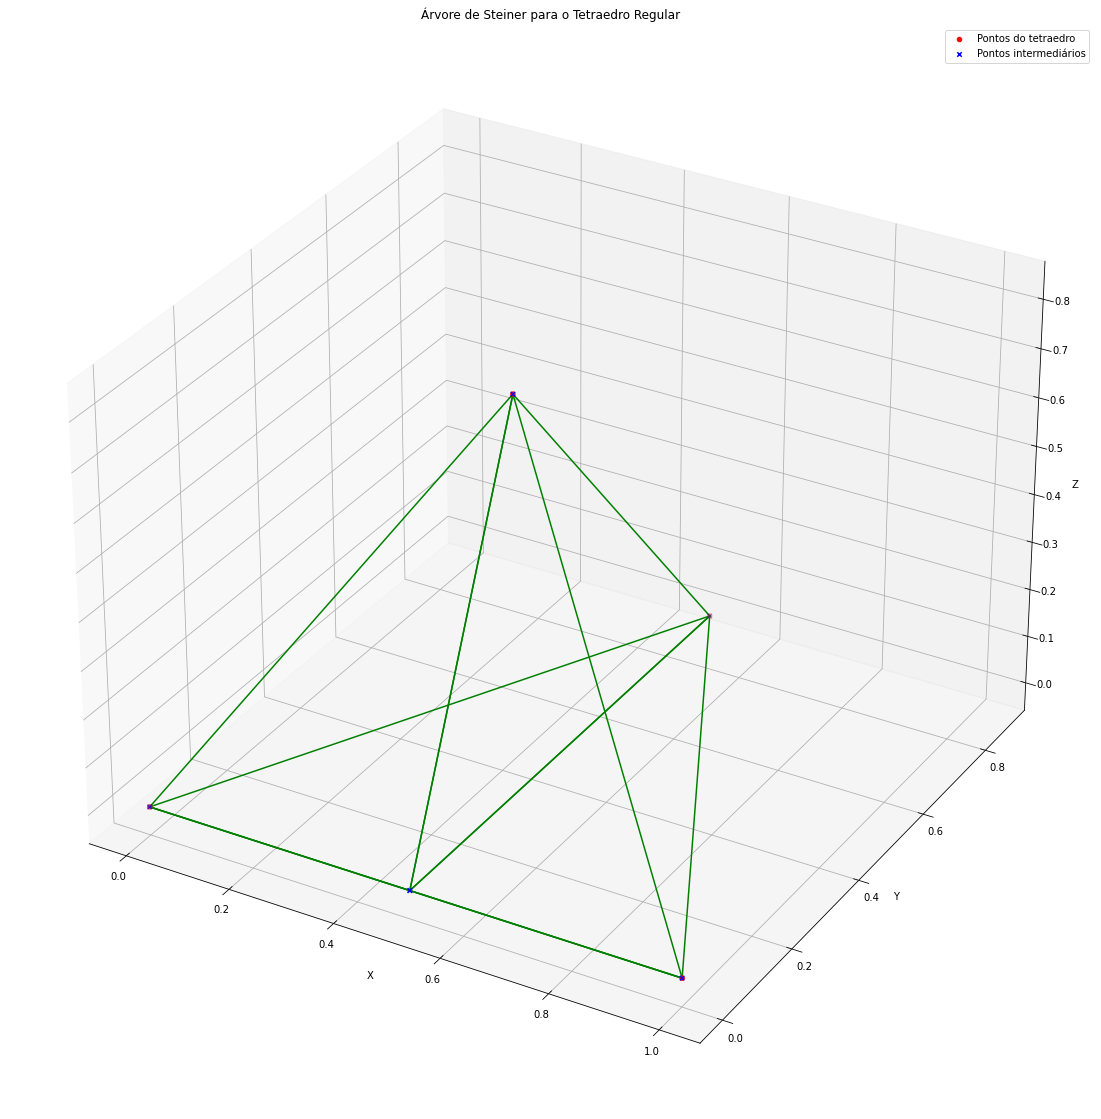

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Definindo os pontos do tetraedro
points = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1/2 , 1/2* np.sqrt(3), 0],
    [1/2 , np.sqrt(3)/6, np.sqrt(6)/3]
])

# Função para calcular a distância entre dois pontos
def distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Função para encontrar o ponto médio entre dois pontos
def midpoint(p1, p2):
    return (p1 + p2) / 2

# Lista para armazenar os pontos intermediários (Steiner points)
steiner_points = points.tolist()

# Iterativamente, adicione pontos intermediários para melhorar a conectividade
for _ in range(2):  # Adicionando dois pontos intermediários
    # Gerar todas as combinações possíveis de pares de pontos
    pairs = list(combinations(range(len(steiner_points)), 2))
    max_dist = 0
    max_pair = None
    
    # Encontrar o par de pontos mais distante
    for pair in pairs:
        dist = distance(np.array(steiner_points[pair[0]]), np.array(steiner_points[pair[1]]))
        if dist > max_dist:
            max_dist = dist
            max_pair = pair
    
    # Adicionar o ponto médio do par de pontos mais distante como um novo ponto intermediário
    new_point = midpoint(np.array(steiner_points[max_pair[0]]), np.array(steiner_points[max_pair[1]]))
    steiner_points.append(new_point.tolist())

# Plotando os pontos
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos do tetraedro
ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o', label='Pontos do tetraedro')

# Plotar os pontos intermediários (Steiner points)
ax.scatter([p[0] for p in steiner_points], [p[1] for p in steiner_points], [p[2] for p in steiner_points], c='b', marker='x', label='Pontos intermediários')

# Conectar os pontos com linhas
for i, p1 in enumerate(steiner_points):
    for j, p2 in enumerate(steiner_points):
        if j > i:
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], c='g')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Árvore de Steiner para o Tetraedro Regular')
plt.show()